## This File is for plot PT distribuition of boosted Higgs.

In [1]:
# Import useful libraries
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
import os

# Import local libraries
# import csv_decoder
# import save_and_load

import function as fn


In [2]:
# time counter
print(time.strftime("%a %b %d %H:%M:%S %Y", time.localtime()))
ticks_1 = time.time()
############################################################################################################################################################

ggh_higgs_list = np.load("./numpy_file_4/ggH_higgs.npy", allow_pickle=True)
vbf_higgs_list = np.load("./numpy_file_4/VBF_higgs.npy", allow_pickle=True)
vh_higgs_list = np.load("./numpy_file_4/VH_higgs.npy", allow_pickle=True)
tth_higgs_list = np.load("./numpy_file_4/ttH_higgs.npy", allow_pickle=True)

############################################################################################################################################################
ticks_2 = time.time()
totaltime =  ticks_2 - ticks_1
print("\033[3;33mTime Cost : {:.4f} min\033[0;m".format(totaltime/60.))


Sun Jul 26 03:54:57 2020
Time Cost : 0.0078 min


In [3]:
print("{:^44}".format("w/ decay and preselection "))
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("","ggH","VBF","VH","ttH"))
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("# of event ",len(ggh_higgs_list),len(vbf_higgs_list),len(vh_higgs_list),len(tth_higgs_list)))


         w/ decay and preselection          
                      ggH    VBF     VH    ttH  
    # of event       229047 374894 278766 259114


In [4]:
ggh_decay = pd.DataFrame(data = {"PTH":ggh_higgs_list[:,0],"Eta":ggh_higgs_list[:,1],
                                 "Phi":ggh_higgs_list[:,2],"M":ggh_higgs_list[:,3],
                                 "evtweight":ggh_higgs_list[:,4],"Vtype":ggh_higgs_list[:,5]})
vbf_decay = pd.DataFrame(data = {"PTH":vbf_higgs_list[:,0],"Eta":vbf_higgs_list[:,1],
                                 "Phi":vbf_higgs_list[:,2],"M":vbf_higgs_list[:,3],
                                 "evtweight":vbf_higgs_list[:,4],"Vtype":vbf_higgs_list[:,5]})
vh_decay = pd.DataFrame(data = {"PTH":vh_higgs_list[:,0],"Eta":vh_higgs_list[:,1],
                                 "Phi":vh_higgs_list[:,2],"M":vh_higgs_list[:,3],
                                 "evtweight":vh_higgs_list[:,4],"Vtype":vh_higgs_list[:,5]})
tth_decay = pd.DataFrame(data = {"PTH":tth_higgs_list[:,0],"Eta":tth_higgs_list[:,1],
                                 "Phi":tth_higgs_list[:,2],"M":tth_higgs_list[:,3],
                                 "evtweight":tth_higgs_list[:,4],"Vtype":tth_higgs_list[:,5]})

In [5]:
vh_w = vh_decay[(vh_decay["PTH"] >= 0) & ( vh_decay["Vtype"] == 24 )]
vh_z = vh_decay[(vh_decay["PTH"] >= 0) & ( vh_decay["Vtype"] == 23 )]
print(len(vh_w),len(vh_z),len(vh_w)+len(vh_z))
print(len(vh_w)/(len(vh_w)+len(vh_z)))
print(len(vh_z)/(len(vh_w)+len(vh_z)))
zh_ratio = len(vh_z)/(len(vh_w)+len(vh_z))
wh_ratio = len(vh_w)/(len(vh_w)+len(vh_z))
print(min(ggh_decay["PTH"]))
print(min(vbf_decay["PTH"]))
print(min(vh_decay["PTH"]))
print(min(tth_decay["PTH"]))


184431 94335 278766
0.6615978993134026
0.3384021006865974
400.0
400.002
400.0
400.001


# Cumulative Cross Section w/ Decay and Preselection

In [6]:
importlib.reload(fn)
ggh_weight_decay = fn.Weight(ggh_decay,"ggF")
vbf_weight_decay = fn.Weight(vbf_decay,"VBF")
vh_weight_decay = fn.Weight(vh_decay,"VH")
tth_weight_decay = fn.Weight(tth_decay,"ttH")

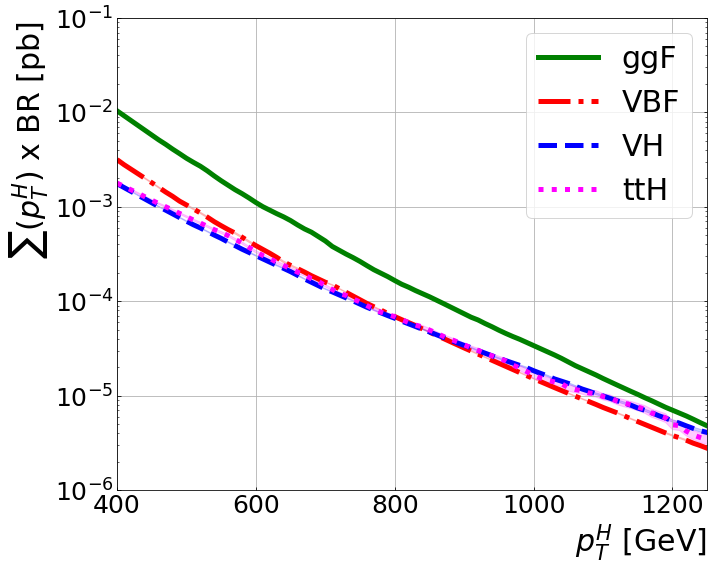

In [7]:
importlib.reload(fn)
zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133
fn.DrawCumulativeXection(ggh_weight_decay, vbf_weight_decay, vh_weight_decay, tth_weight_decay, 
                      ggh_factor=0.5824, vbf_factor=0.5824, vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991), tth_factor=0.5824,
                       note="_decay",decay=1 )


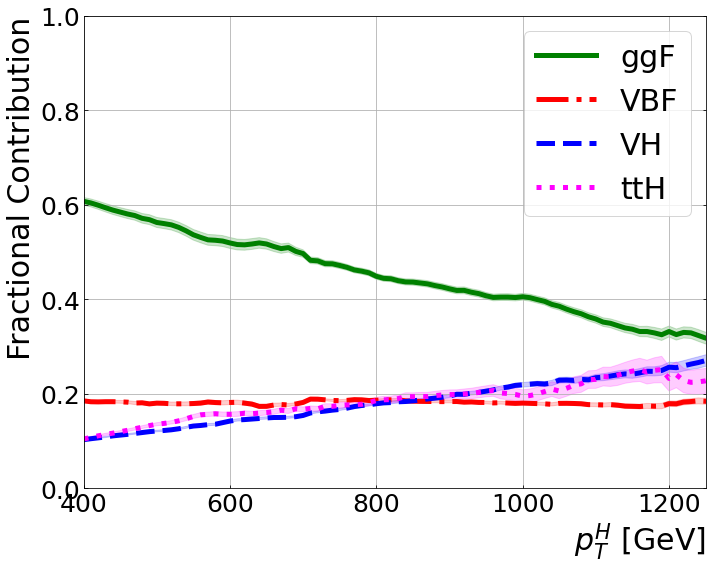

In [8]:
importlib.reload(fn)
zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133
fn.DrawFractional(ggh_weight_decay, vbf_weight_decay, vh_weight_decay, tth_weight_decay, 
                      ggh_factor=0.5824, vbf_factor=0.5824, vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991), tth_factor=0.5824,
                     note="_decay")



# Load File after adding the prediction after BDT training.

In [9]:
my_data_file_path = './BDT_Model_for_test/Data_train.csv'
# my_data_file_path = './BDT_Model_for_test/Data_train_w_pre_800.csv'
# my_data_file_path = './BDT_Model/Data_val.csv'
# my_data_file_path = './BDT_Model/Data_train.csv'
# read the data and store data in DataFrame
Data_test = pd.read_csv(my_data_file_path)
# Data_test_800 = pd.read_csv(my_data_file_path_800)

pre_GBDT = np.load("./BDT_Model_for_test/GBDT_pre.npy")

# Data_test = pd.concat([pd.read_csv('./BDT_Model/Data_test.csv'),pd.read_csv('./BDT_Model/Data_val.csv')],ignore_index=True,axis=0,join='inner')
# Data_test = pd.concat([Data_test,pd.read_csv('./BDT_Model/Data_train.csv')],ignore_index=True,axis=0,join='inner')

list = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
           "non_higgs_second_pt","non_higgs_second_eta","non_higgs_second_m",
           "girth","CIJS","SIJS","DeltaEta",
            "weight","isHJ","isVBF","isVH","eventindex","prediction"]

Data_test["PTH"],Data_test["evtweight"] = Data_test["higgs_pt"],Data_test["weight"]
Data_test["pre_GBDT_out1"],Data_test["pre_GBDT_out2"] = pre_GBDT[:,0], pre_GBDT[:,1]
Data_test["pre_GBDT_out3"],Data_test["pre_GBDT_out4"] = pre_GBDT[:,2], pre_GBDT[:,3]

zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133

ggF_Factor, VBF_Factor, VH_Factor, ttH_Factor = 229066./229000., 374654./229000., 278766./229000., 259114./229000.

# ggF_Factor, VBF_Factor, VH_Factor, ttH_Factor = 119160./119124., 187444./114656., 146762./120812., 141065./124587.





In [10]:
print(len(Data_test[(Data_test["isGGH"]==1 )& (Data_test["PTH"] >= 400 )]))
print(len(Data_test[(Data_test["isVBF"]==1 )& (Data_test["PTH"] >= 400 )]))
print(len(Data_test[(Data_test["isVH"]==1 )& (Data_test["PTH"] >= 400 )]))
print(len(Data_test[(Data_test["isttH"]==1 )& (Data_test["PTH"] >= 400 )]))

228983
228985
228988
228966


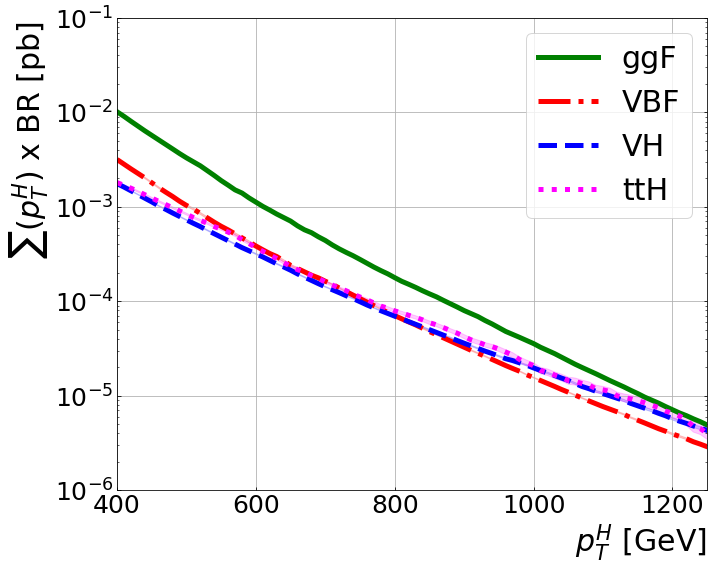

In [11]:
importlib.reload(fn)
ggF = Data_test[Data_test["isGGH"]==1]
VBF = Data_test[Data_test["isVBF"]==1]
VH = Data_test[Data_test["isVH"]==1]
ttH = Data_test[Data_test["isttH"]==1]

ggh_weight_test = fn.Weight(ggF,"ggF", index=2,PTmin=400)
vbf_weight_test = fn.Weight(VBF,"VBF", index=2,PTmin=400)
vh_weight_test = fn.Weight(VH,"VH", index=2,PTmin=400)
tth_weight_test = fn.Weight(ttH,"ttH", index=2,PTmin=400)

zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133
fn.DrawCumulativeXection(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                        note = "_BDT_wo_cut",decay=1)




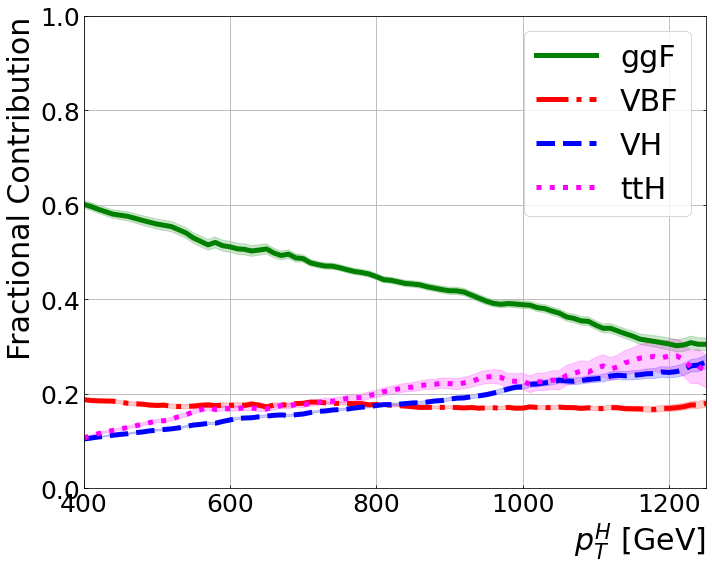

In [12]:
fn.DrawFractional(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                       note = "_BDT_wo_cut")



(array([19]),)
[2306.14077377] [300.02075742]
0.19000000000000003
ggF efficiency:  [0.75690271]
Others rejection rate:  [0.67653007]


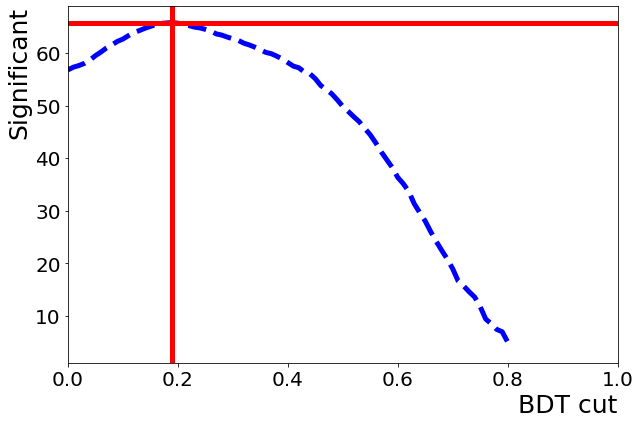

In [13]:
importlib.reload(fn)
def Z(s,b):
    z = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
#     z = s/np.sqrt(b)
    return z


Luminosity = 300 #fb-1 run3
# significance = [] 
# PTCUT = np.linspace(400,1200,81)

ptcut = 400

# for ptcut in PTCUT:
N = 100
cut = np.zeros([N+1])
NggH, NVBF, NVH, NttH, Nother = np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1])
cut[0] = 0
ggF = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_GBDT_out1"] > 0) & (Data_test["PTH"] > ptcut)]    #prediction  #BDT
VBF = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_GBDT_out1"] > 0) & (Data_test["PTH"] > ptcut)]
VH = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_GBDT_out1"] > 0) & (Data_test["PTH"] > ptcut)]
ttH = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_GBDT_out1"] > 0) & (Data_test["PTH"] > ptcut)]
Other = Data_test[(Data_test["isGGH"]!=1) & (Data_test["pre_GBDT_out1"] > 0) & (Data_test["PTH"] > ptcut)] 

ggh_BDTcut = fn.Weight(ggF,"ggF",PTmin=ptcut, index=2)
vbf_BDTcut = fn.Weight(VBF,"VBF",PTmin=ptcut, index=2)
vh_BDTcut = fn.Weight(VH,"VH",PTmin=ptcut, index=2)
tth_BDTcut = fn.Weight(ttH,"ttH",PTmin=ptcut, index=2)


NggH[0] = (np.array(ggh_BDTcut[2])*0.5824*ggF_Factor)[0]*Luminosity*1000 
NVBF[0] = (np.array(vbf_BDTcut[2])*0.5824*VBF_Factor)[0]*Luminosity*1000 
NVH[0] =  (np.array(vh_BDTcut[2])*0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor)[0]*Luminosity*1000 
NttH[0] = (np.array(tth_BDTcut[2])*0.5824*ttH_Factor)[0]*Luminosity*1000 
Nother[0] = len(Other)

for i in range(N):
    cut[i+1] = cut[i] + 1./N
    ggF = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_GBDT_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    VBF = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_GBDT_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    VH = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_GBDT_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    ttH = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_GBDT_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    Other = Data_test[(Data_test["isGGH"]!=1) & (Data_test["pre_GBDT_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    
    ggh_BDTcut = fn.Weight(ggF,"ggF",PTmin=ptcut, index=2)
    vbf_BDTcut = fn.Weight(VBF,"VBF",PTmin=ptcut, index=2)
    vh_BDTcut = fn.Weight(VH,"VH",PTmin=ptcut, index=2)
    tth_BDTcut = fn.Weight(ttH,"ttH",PTmin=ptcut, index=2)
    
    NggH[i+1] = (np.array(ggh_BDTcut[2])*0.5824*ggF_Factor)[0]*Luminosity*1000 
    NVBF[i+1] = (np.array(vbf_BDTcut[2])*0.5824*VBF_Factor)[0]*Luminosity*1000 
    NVH[i+1] = (np.array(vh_BDTcut[2])*0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor)[0]*Luminosity*1000 
    NttH[i+1] = (np.array(tth_BDTcut[2])*0.5824*ttH_Factor)[0]*Luminosity*1000 

#     if len(ggF) == 0:
#         N = i
#         break

    if NggH[i+1] <= 0:
        N = i
        break
    elif NVBF[i+1]+NVH[i+1]+NttH[i+1] ==0:
        N = i
        break

sig = np.array(Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])))
cut_opt = cut[np.where(sig == max(sig))][0]
print(np.where(sig == max(sig)))
print(NggH[np.where(sig == max(sig))],NVBF[np.where(sig == max(sig))])
print(cut_opt)

index = np.where(sig == max(sig))
print("ggF efficiency: ", NggH[index]/NggH[0])
print("Others rejection rate: ", 1-(NVBF[index]+NVH[index]+NttH[index])/(NVBF[0]+NVH[0]+NttH[0]))

max_sig = max(sig)
# significance.append(max_sig)


fig, ax = plt.subplots(1,1, figsize=(9,6))
# plt.plot(cut[:N],Z(NggH[:N],Nother[:N]),"k--",label="Significant")
plt.plot(cut[:N],Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])),"--",color="blue",linewidth = 5,label="Significant")
ax.axvline(cut_opt , linewidth = 5, linestyle = "-", color = "red")
ax.axhline(max_sig , linewidth = 5, linestyle = "-", color = "red")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("BDT cut", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel("Significant", fontsize=25,horizontalalignment='right',y=1)

plt.xlim((0,1))
# plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=10)
plt.savefig("./Higgs_Pt/sig_scan_BDT.pdf", transparent=True)
plt.tight_layout()
plt.show()


In [14]:
# np.save("./significance_BDT_400",Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])))

## We can easily to choose the event we want in this way.

In [15]:
BDTCUT = cut_opt
ggH_BDT_cut = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_GBDT_out1"] >= BDTCUT) ]
VBF_BDT_cut = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_GBDT_out1"] >= BDTCUT) ]
VH_BDT_cut = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_GBDT_out1"] >= BDTCUT) ]
ttH_BDT_cut = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_GBDT_out1"] >= BDTCUT) ]
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("","ggH","VBF","VH","ttH"))
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("# of event w/ BDT Cut ",len(ggH_BDT_cut),len(VBF_BDT_cut),len(VH_BDT_cut),len(ttH_BDT_cut)))
# print(Z(len(ggH_BDT_cut),len(VBF_BDT_cut)+len(VH_BDT_cut)+len(ttH_BDT_cut)))

ggH_weight_BDT = fn.Weight(ggH_BDT_cut,"ggF", index=2,PTmin=400)
VBF_weight_BDT = fn.Weight(VBF_BDT_cut,"VBF", index=2,PTmin=400)
VH_weight_BDT = fn.Weight(VH_BDT_cut,"VH", index=2,PTmin=400)
ttH_weight_BDT = fn.Weight(ttH_BDT_cut,"ttH", index=2,PTmin=400)


                      ggH    VBF     VH    ttH  
# of event w/ BDT Cut  186040 86874  86919  96534 


# Cumulative Xection

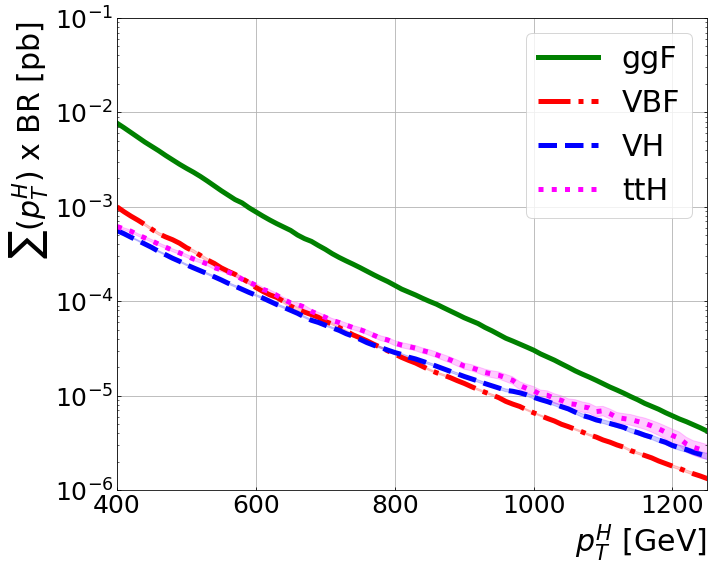

In [16]:
importlib.reload(fn)
fn.DrawCumulativeXection(ggH_weight_BDT, VBF_weight_BDT, VH_weight_BDT, ttH_weight_BDT, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                        note="_BDT_w_cut",decay=1)

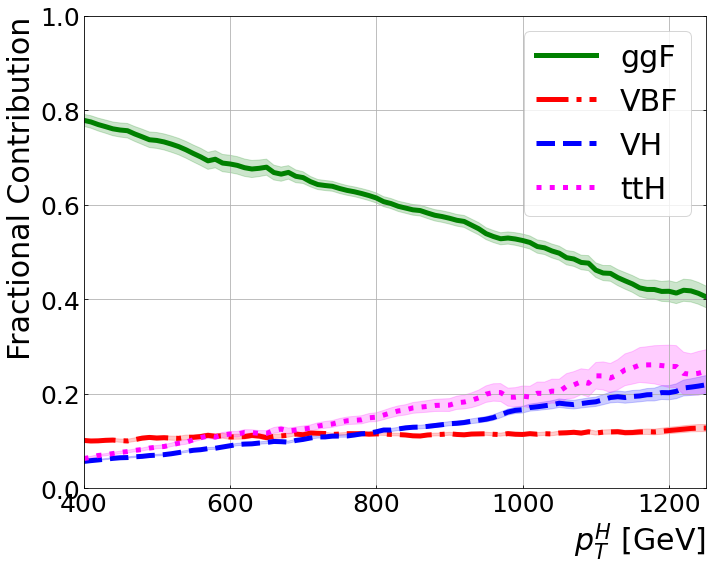

In [17]:
importlib.reload(fn)
fn.DrawFractional(ggH_weight_BDT, VBF_weight_BDT, VH_weight_BDT, ttH_weight_BDT, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                         note="_BDT_w_cut")


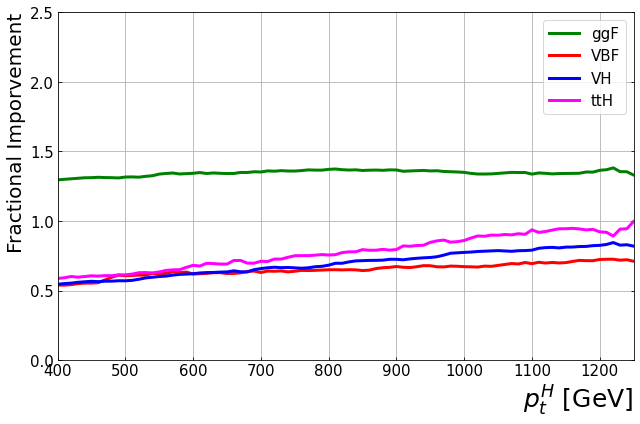

In [18]:
importlib.reload(fn)
fn.DrawFractionalImprovement(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test,
                        ggH_weight_BDT, VBF_weight_BDT, VH_weight_BDT, ttH_weight_BDT, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                    note="_BDT")

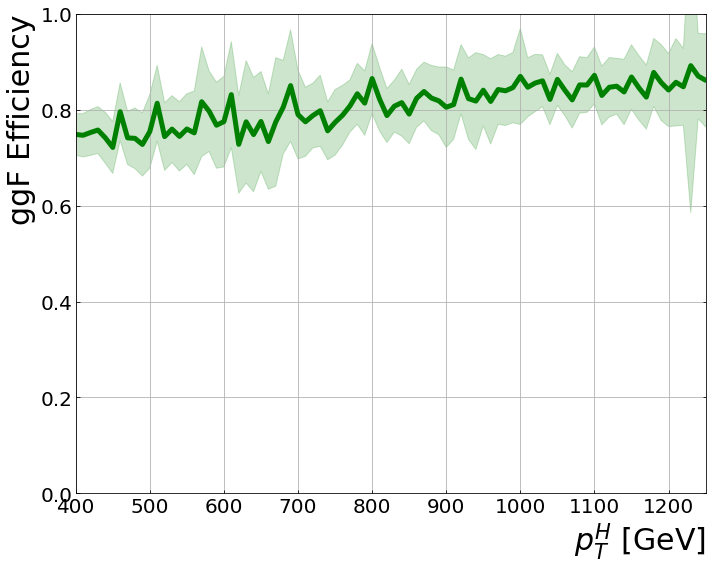

In [19]:
importlib.reload(fn)
fn.Efficiency(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test,
                        ggH_weight_BDT, VBF_weight_BDT, VH_weight_BDT, ttH_weight_BDT, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                    note="_BDT")

# Load File after adding the prediction after 2CNN training.

In [20]:
# my_data_file_path = './BDT_Model/Data_test.csv'
my_data_file_path = "./BDT_Model_for_test/Data_train.csv"
# read the data and store data in DataFrame
Data_test = pd.read_csv(my_data_file_path)

pre_2CNN = np.load("./2CNN_pre_rotated.npy")
pre_GBDT = np.load("./BDT_Model_for_test/GBDT_pre.npy")



list = ["higgs_pt","higgs_eta","higgs_m",
           "non_higgs_leading_pt","non_higgs_leading_eta","non_higgs_leading_m",
           "non_higgs_second_pt","non_higgs_second_eta","non_higgs_second_m",
           "girth","CIJS","SIJS","DeltaEta",
            "weight","isHJ","isVBF","isVH","eventindex","2CNN_Prediction"]

Data_test["PTH"],Data_test["evtweight"] = Data_test["higgs_pt"],Data_test["weight"]
Data_test["pre_2CNN_out1"],Data_test["pre_2CNN_out2"] = pre_2CNN[:,0], pre_2CNN[:,1]
Data_test["pre_2CNN_out3"],Data_test["pre_2CNN_out4"] = pre_2CNN[:,2], pre_2CNN[:,3]

zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133

ggF_Factor, VBF_Factor, VH_Factor, ttH_Factor = 229066./229000., 374654./229000., 278766./229000., 259114./229000.

# ggF_Factor, VBF_Factor, VH_Factor, ttH_Factor = 119160./119124., 187444./114656., 146762./120812., 141065./124587.




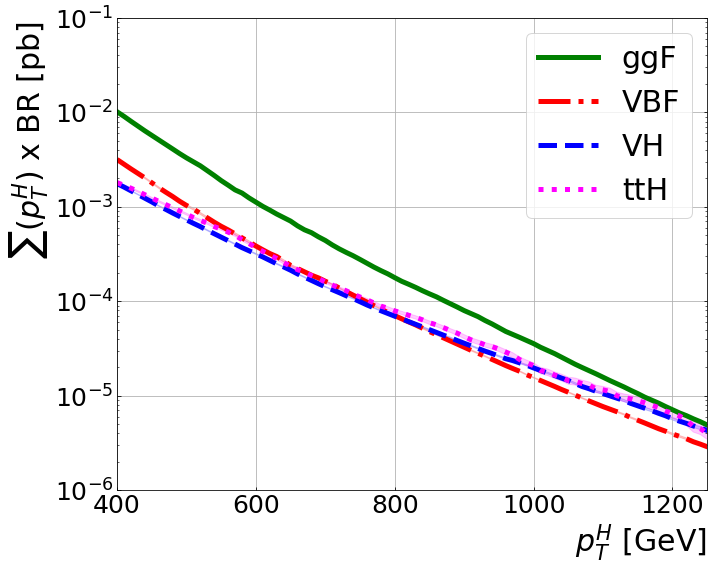

In [21]:
importlib.reload(fn)
ggF = Data_test[Data_test["isGGH"]==1]
VBF = Data_test[Data_test["isVBF"]==1]
VH = Data_test[Data_test["isVH"]==1]
ttH = Data_test[Data_test["isttH"]==1]

ggh_weight_test = fn.Weight(ggF,"ggF", index=2,PTmin=400)
vbf_weight_test = fn.Weight(VBF,"VBF", index=2,PTmin=400)
vh_weight_test = fn.Weight(VH,"VH", index=2,PTmin=400)
tth_weight_test = fn.Weight(ttH,"ttH", index=2,PTmin=400)

zh_ratio, wh_ratio = 0.661816317958867, 0.338183682041133
fn.DrawCumulativeXection(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                        note = "_2CNN_wo_cut",decay=1)





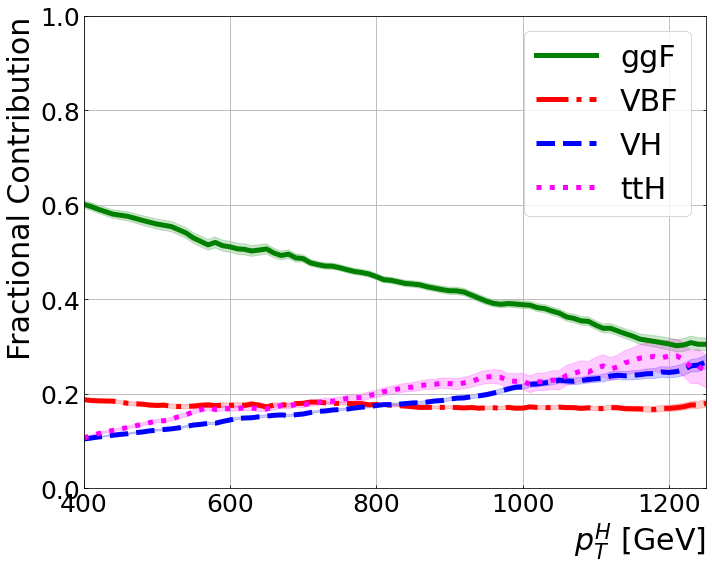

In [22]:
importlib.reload(fn)
fn.DrawFractional(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                       note = "_2CNN_wo_cut")


(array([36]),)
[2156.3187531] [115.25219729]
0.36000000000000015
ggF efficiency:  [0.70772935]
Others rejection rate:  [0.87710814]


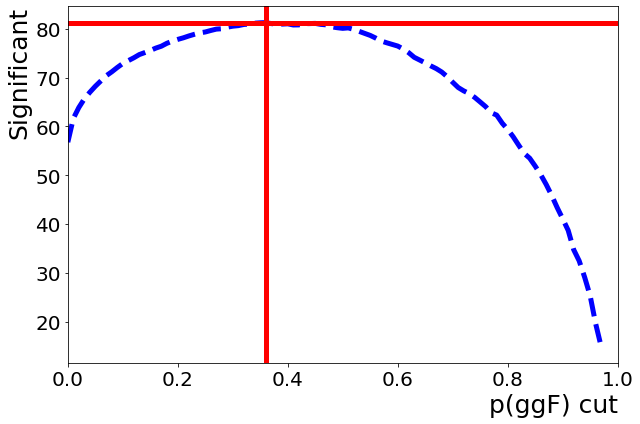

In [23]:
importlib.reload(fn)
def Z(s,b):
    z = np.sqrt(2*((s+b)*np.log(1+s/b)-s))
#     z = s/np.sqrt(b)
    return z


Luminosity = 300 #fb-1 run3
# significance = [] 
# PTCUT = np.linspace(400,1200,81)

ptcut = 400

# for ptcut in PTCUT:
N = 100
cut = np.zeros([N+1])
NggH, NVBF, NVH, NttH, Nother = np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1]), np.zeros([N+1])
cut[0] = 0
ggF = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_2CNN_out1"] > 0) & (Data_test["PTH"] > ptcut)]    #prediction  #BDT
VBF = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_2CNN_out1"] > 0) & (Data_test["PTH"] > ptcut)]
VH = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_2CNN_out1"] > 0) & (Data_test["PTH"] > ptcut)]
ttH = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_2CNN_out1"] > 0) & (Data_test["PTH"] > ptcut)]
Other = Data_test[(Data_test["isGGH"]!=1) & (Data_test["pre_2CNN_out1"] > 0) & (Data_test["PTH"] > ptcut)] 

ggh_BDTcut = fn.Weight(ggF,"ggF",PTmin=ptcut, index=2)
vbf_BDTcut = fn.Weight(VBF,"VBF",PTmin=ptcut, index=2)
vh_BDTcut = fn.Weight(VH,"VH",PTmin=ptcut, index=2)
tth_BDTcut = fn.Weight(ttH,"ttH",PTmin=ptcut, index=2)


NggH[0] = (np.array(ggh_BDTcut[2])*0.5824*ggF_Factor)[0]*Luminosity*1000 
NVBF[0] = (np.array(vbf_BDTcut[2])*0.5824*VBF_Factor)[0]*Luminosity*1000 
NVH[0] =  (np.array(vh_BDTcut[2])*0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor)[0]*Luminosity*1000 
NttH[0] = (np.array(tth_BDTcut[2])*0.5824*ttH_Factor)[0]*Luminosity*1000 
Nother[0] = len(Other)

for i in range(N):
    cut[i+1] = cut[i] + 1./N
    ggF = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_2CNN_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    VBF = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_2CNN_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    VH = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_2CNN_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    ttH = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_2CNN_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    Other = Data_test[(Data_test["isGGH"]!=1) & (Data_test["pre_2CNN_out1"] > cut[i+1]) & (Data_test["PTH"] > ptcut)]
    
    ggh_BDTcut = fn.Weight(ggF,"ggF",PTmin=ptcut, index=2)
    vbf_BDTcut = fn.Weight(VBF,"VBF",PTmin=ptcut, index=2)
    vh_BDTcut = fn.Weight(VH,"VH",PTmin=ptcut, index=2)
    tth_BDTcut = fn.Weight(ttH,"ttH",PTmin=ptcut, index=2)
    
    NggH[i+1] = (np.array(ggh_BDTcut[2])*0.5824*ggF_Factor)[0]*Luminosity*1000 
    NVBF[i+1] = (np.array(vbf_BDTcut[2])*0.5824*VBF_Factor)[0]*Luminosity*1000 
    NVH[i+1] = (np.array(vh_BDTcut[2])*0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor)[0]*Luminosity*1000 
    NttH[i+1] = (np.array(tth_BDTcut[2])*0.5824*ttH_Factor)[0]*Luminosity*1000 

#     if len(ggF) == 0:
#         N = i
#         break

    if NggH[i+1] <= 0:
        N = i
        break
#     if NVBF[i+1] <= 0:
#         N = i
#         break
    elif NVBF[i+1]+NVH[i+1]+NttH[i+1] ==0:
        N = i
        break

sig = np.array(Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])))

# sig = np.array(Z(NVBF[:N],(NggH[:N]+NVH[:N]+NttH[:N])))
# sig = np.array(Z(NVH[:N],(NggH[:N]+NVBF[:N]+NttH[:N])))

cut_opt = cut[np.where(sig == max(sig))][0]
print(np.where(sig == max(sig)))
print(NggH[np.where(sig == max(sig))],NVBF[np.where(sig == max(sig))])
print(cut_opt)

index = np.where(sig == max(sig))
print("ggF efficiency: ", NggH[index]/NggH[0])
print("Others rejection rate: ", 1-(NVBF[index]+NVH[index]+NttH[index])/(NVBF[0]+NVH[0]+NttH[0]))

max_sig = max(sig)
# significance.append(max_sig)


fig, ax = plt.subplots(1,1, figsize=(9,6))
# plt.plot(cut[:N],Z(NggH[:N],Nother[:N]),"k--",label="Significant")
plt.plot(cut[:N],Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])),"--",color="blue",linewidth = 5,label="Significant")

# plt.plot(cut[:N],Z(NVBF[:N],(NggH[:N]+NVH[:N]+NttH[:N])),"k--",label="Significant")
# plt.plot(cut[:N],Z(NVH[:N],(NggH[:N]+NVBF[:N]+NttH[:N])),"k--",label="Significant")
ax.axvline(cut_opt , linewidth = 5, linestyle = "-", color = "red")
ax.axhline(max_sig , linewidth = 5, linestyle = "-", color = "red")

ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
plt.xlabel("p(ggF) cut", fontsize=25,horizontalalignment='right',x=1)
plt.ylabel("Significant", fontsize=25,horizontalalignment='right',y=1)

plt.xlim((0,1))
# plt.legend(bbox_to_anchor=(1, 1),ncol=1,fontsize=10)
# plt.savefig("./Higgs_Pt/2CNN_sig_scan", transparent=True)
plt.tight_layout()
plt.show()



In [24]:
# np.save("./significance_2CNN_400",Z(NggH[:N],(NVBF[:N]+NVH[:N]+NttH[:N])))

In [25]:
importlib.reload(fn)
CNNCUT = cut_opt
# CNNCUT = 0.33
ggH_2CNN_cut = Data_test[(Data_test["isGGH"]==1) & (Data_test["pre_2CNN_out1"] >= CNNCUT) ]
VBF_2CNN_cut = Data_test[(Data_test["isVBF"]==1) & (Data_test["pre_2CNN_out1"] >= CNNCUT) ]
VH_2CNN_cut = Data_test[(Data_test["isVH"]==1) & (Data_test["pre_2CNN_out1"] >= CNNCUT) ]
ttH_2CNN_cut = Data_test[(Data_test["isttH"]==1) & (Data_test["pre_2CNN_out1"] >= CNNCUT) ]
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("","ggH","VBF","VH","ttH"))
print("{:^20} {:^6} {:^6} {:^6} {:^6}".format("# of event w/ 2CNN Cut ",len(ggH_2CNN_cut),len(VBF_2CNN_cut),len(VH_2CNN_cut),len(ttH_2CNN_cut)))
print(Z(len(ggH_2CNN_cut),len(VBF_2CNN_cut)+len(VH_2CNN_cut)+len(ttH_2CNN_cut)))


ggH_2CNN_cut = fn.Weight(ggH_2CNN_cut,"ggF")
VBF_2CNN_cut = fn.Weight(VBF_2CNN_cut,"VBF")
VH_2CNN_cut = fn.Weight(VH_2CNN_cut,"VH")
ttH_2CNN_cut = fn.Weight(ttH_2CNN_cut,"ttH")


                      ggH    VBF     VH    ttH  
# of event w/ 2CNN Cut  162951 28473  37239  28677 
436.24358591395395


In [26]:
# # sum(VBF_2CNN_cut["weight"])/(sum(ggH_2CNN_cut["weight"])+sum(VBF_2CNN_cut["weight"])+sum(VH_2CNN_cut["weight"])+sum(ttH_2CNN_cut["weight"]))

# sum(VH_2CNN_cut["weight"])/(sum(ggH_2CNN_cut["weight"])+sum(VBF_2CNN_cut["weight"])+sum(VH_2CNN_cut["weight"])+sum(ttH_2CNN_cut["weight"]))




# Cumulative Xection

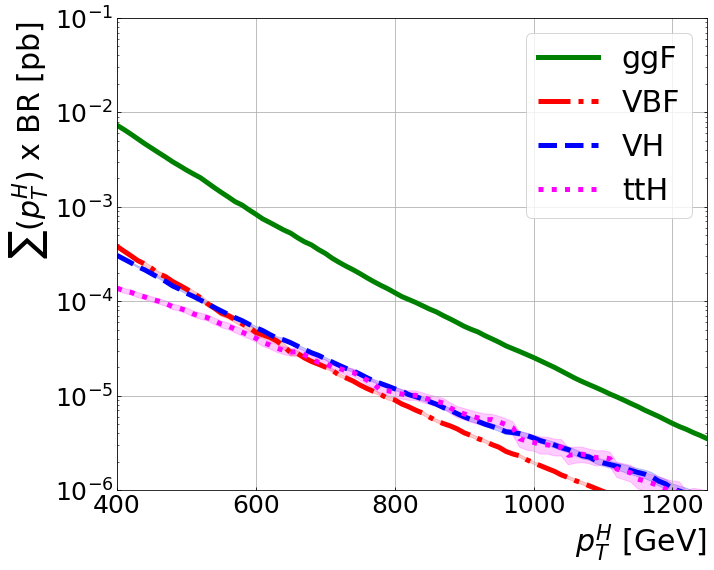

In [27]:
importlib.reload(fn)
fn.DrawCumulativeXection(ggH_2CNN_cut, VBF_2CNN_cut, VH_2CNN_cut, ttH_2CNN_cut, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                        note="_2CNN_w_cut",decay=1)

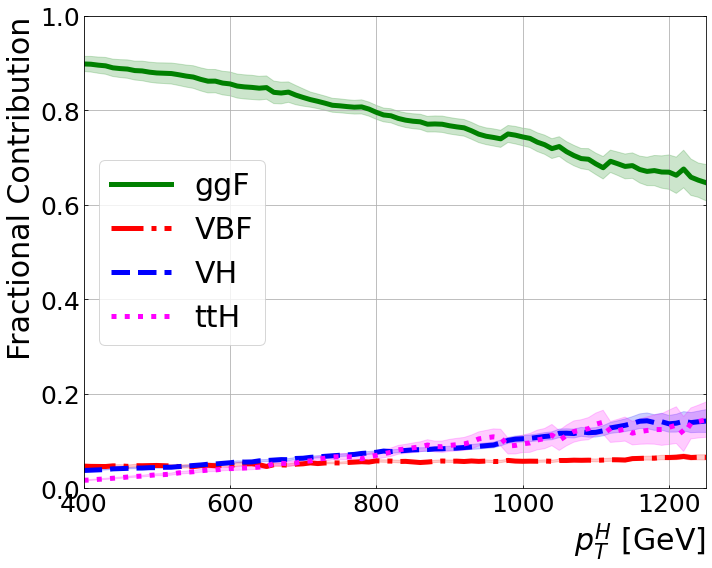

In [28]:
importlib.reload(fn)
fn.DrawFractional(ggH_2CNN_cut, VBF_2CNN_cut, VH_2CNN_cut, ttH_2CNN_cut, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                      note="_2CNN_w_cut")




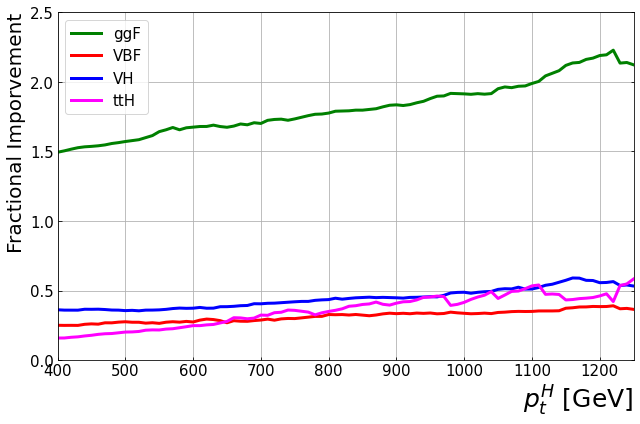

In [29]:
importlib.reload(fn)
fn.DrawFractionalImprovement(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test,
                        ggH_2CNN_cut, VBF_2CNN_cut, VH_2CNN_cut, ttH_2CNN_cut, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                    note="_2CNN")

/dicos_ui_home/alanchung/Higgs/function.py:367: RuntimeWarning: divide by zero encountered in double_scalars
  div_error.append((xs_after[i]/xs_before[i])*np.sqrt((error_before[i]/xs_before[i])**2+(error_after[i]/xs_after[i])**2))
/dicos_ui_home/alanchung/Higgs/function.py:367: RuntimeWarning: invalid value encountered in double_scalars
  div_error.append((xs_after[i]/xs_before[i])*np.sqrt((error_before[i]/xs_before[i])**2+(error_after[i]/xs_after[i])**2))


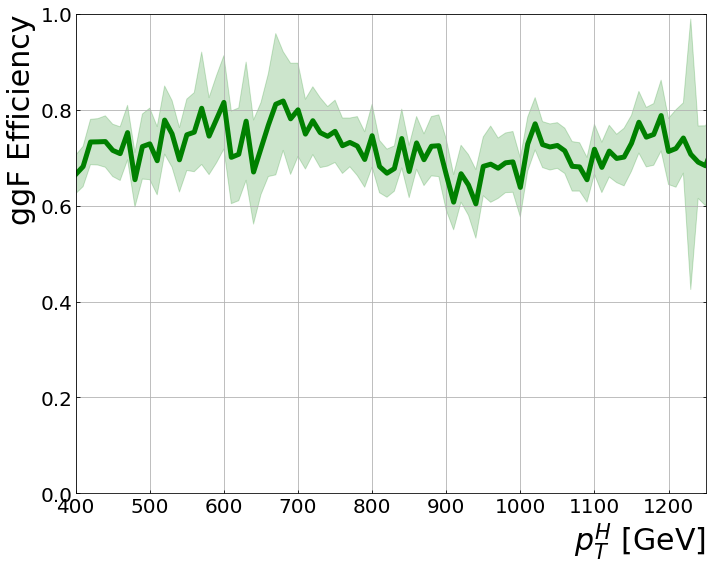

In [30]:
importlib.reload(fn)
fn.Efficiency(ggh_weight_test, vbf_weight_test, vh_weight_test, tth_weight_test,
                        ggH_2CNN_cut, VBF_2CNN_cut, VH_2CNN_cut, ttH_2CNN_cut, 
                      ggh_factor=0.5824*ggF_Factor, 
                      vbf_factor=0.5824*VBF_Factor,
                      vh_factor=0.5824*(wh_ratio*0.6741+zh_ratio*0.6991)*VH_Factor,
                      tth_factor=0.5824*ttH_Factor,
                    note="_2CNN")
